In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
train_data = pd.read_csv('/Users/aga/Desktop/brainhack/selected_train.csv', sep=',')
#val_data = pd.read_csv('/Users/aga/Desktop/brainhack/selected_validation.csv', sep=',')

In [3]:
labels_train_filename = '/Users/aga/Desktop/brainhack/training_fluid_intelligenceV1.csv'
#labels_val_filename = '/Users/aga/Desktop/brainhack/validation_fluid_intelligenceV1.csv'
labels_train = pd.read_csv(labels_train_filename, sep=',')
#labels_val = pd.read_csv(labels_val_filename, sep=',')

In [4]:
train_data.head()

,Unnamed: 0,subjectkey,sri24frontalsuplgm,sri24frontalsuprgm,sri24frontalsuporblgm,sri24frontalsuporbrgm,sri24frontalmidlgm,sri24frontalmidrgm,sri24frontalmidorblgm,sri24frontalmidorbrgm,...,sri24frontalinforblgm,sri24frontalinforbrgm,sri24frontalmedorblgm,sri24frontalmedorbrgm,sri24cingulumantlgm,sri24cingulumantrgm,sri24cingulummidlgm,sri24cingulummidrgm,gender_F,gender_M
0,3190,NDAR_INV007W6H7B,11608.2,10292.9,1728.07,2551.04,14212.1,16382.9,3266.63,3515.72,...,6735.91,5800.48,3072.09,2723.33,4235.04,4777.53,6395.13,7490.97,0,1
1,3020,NDAR_INV00CY2MDM,12302.6,11765.0,2520.28,2607.39,16888.4,19027.7,3978.52,3822.51,...,6643.10,5948.38,2642.61,2877.07,5346.31,4512.14,7001.95,6285.88,0,1
2,390,NDAR_INV00HEV6HB,11229.8,10384.5,2411.15,2160.34,18548.3,18598.8,3927.01,4597.59,...,7109.42,7357.31,3120.80,3785.27,4271.38,4437.63,5781.24,6552.67,0,1
3,1431,NDAR_INV00LJVZK2,13261.8,10869.4,2688.43,2236.71,15229.9,16650.1,4104.68,4826.16,...,7519.14,6390.69,3671.06,3524.43,4192.99,4628.82,7029.24,7318.81,0,1
4,4028,NDAR_INV00NPMHND,11329.6,10342.0,2373.23,2224.30,13785.5,17434.4,4764.47,4751.08,...,7308.55,5841.64,2897.32,3019.39,6284.10,5529.26,6997.10,7596.34,1,0


In [5]:
train_data_labels = pd.merge(train_data, labels_train, left_on='subjectkey', right_on='subject').drop(['subject'], axis=1)
#val_data_labels = pd.merge(val_data, labels_val, left_on='subjectkey', right_on='subject').drop(['subject'], axis=1)

In [ ]:
#val_data_labels.head()

In [ ]:
#val_data.head()

In [6]:
#remove keys
#todo: prepare training without residuals already; ,'residual_fluid_intelligence_score'
train_data = train_data.drop(['Unnamed: 0','subjectkey'],axis=1)
#val_data = val_data.drop(['Unnamed: 0','subjectkey'],axis=1)

In [7]:
train_data.values.astype(np.float)
#val_data.values.astype(np.float)

array([[1.16082e+04, 1.02929e+04, 1.72807e+03, ..., 7.49097e+03,
        0.00000e+00, 1.00000e+00],
       [1.23026e+04, 1.17650e+04, 2.52028e+03, ..., 6.28588e+03,
        0.00000e+00, 1.00000e+00],
       [1.12298e+04, 1.03845e+04, 2.41115e+03, ..., 6.55267e+03,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.26083e+04, 1.14297e+04, 2.01997e+03, ..., 5.42623e+03,
        0.00000e+00, 1.00000e+00],
       [1.43482e+04, 1.21044e+04, 2.13577e+03, ..., 6.22951e+03,
        1.00000e+00, 0.00000e+00],
       [1.46661e+04, 1.21172e+04, 2.65748e+03, ..., 8.09903e+03,
        1.00000e+00, 0.00000e+00]])

In [8]:
#first normalize with respect to column
def normalize_data(data: np.array, standardize=True):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    if not standardize:
        return data-means
    return (data-means)/stds

In [9]:
train_norm_data = normalize_data(train_data)
#val_norm_data = normalize_data(val_data)

In [10]:
train_norm_data[np.isnan(train_norm_data)] = 0

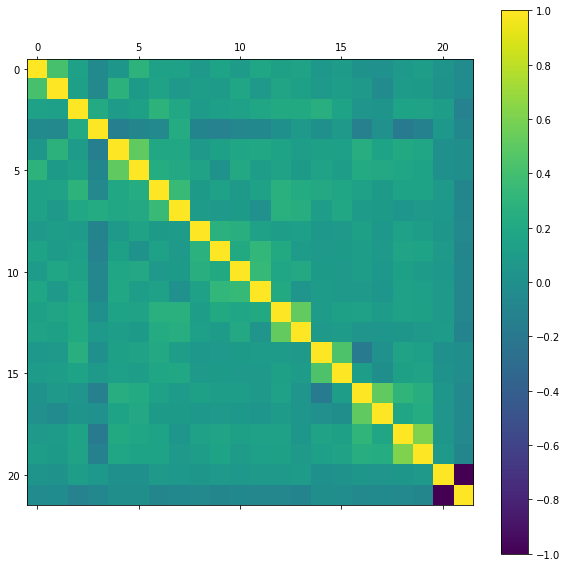

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
#Covariance matrix of features
def compute_covariance(matrix):
    return matrix.T.dot(matrix)/matrix.shape[0]

cov_matrix = compute_covariance(train_norm_data)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(cov_matrix, interpolation='none')
fig.colorbar(im, ticks=[-1,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

In [14]:
from sklearn.decomposition import PCA

In [15]:
#PCA
n_components = [2,3,4,5,6,7,8,9,10]
for n in n_components:
    curr_pca = PCA(n_components=n)
    curr_pca.fit_transform(train_norm_data)
    print("For {} components, the explained variance by them is : {:.3f}".format(n, np.sum(curr_pca.explained_variance_ratio_)))

print("*"*10)
explained_variance = [0.8, 0.85, 0.9, 0.95]
for target_variance in explained_variance:
    curr_pca = PCA(n_components=target_variance)
    curr_pca.fit_transform(train_norm_data)
    print("The {} variance ratio is explained by {} components ".format(target_variance, np.sum(curr_pca.n_components_)))

For 2 components, the explained variance by them is : 0.266
For 3 components, the explained variance by them is : 0.350
For 4 components, the explained variance by them is : 0.419
For 5 components, the explained variance by them is : 0.482
For 6 components, the explained variance by them is : 0.540
For 7 components, the explained variance by them is : 0.591
For 8 components, the explained variance by them is : 0.637
For 9 components, the explained variance by them is : 0.680
For 10 components, the explained variance by them is : 0.721
**********
The 0.8 variance ratio is explained by 13 components 
The 0.85 variance ratio is explained by 14 components 
The 0.9 variance ratio is explained by 16 components 
The 0.95 variance ratio is explained by 18 components 


In [16]:
#Covariance matrix of features
def get_eigenvalues(data, n_comps, standardize=True):
    normalized_data = normalize_data(data, standardize)
    cov_matrix = compute_covariance(normalized_data)
    pca = PCA(n_comps)
    pca.fit_transform(normalized_data)
    eigenvectors = pca.components_
    eigenvalues = []
    for ev in eigenvectors:
        eigenvalues.append(np.dot(ev.T, np.dot(cov_matrix, ev)))
    print(pca.explained_variance_)
    return eigenvalues

In [17]:
#norm?
get_eigenvalues(train_norm_data, 3)

[3.82318316 2.03122804 1.85630096]


[3.822160824888969, 2.030730567339761, 1.8559109874540902]

/Users/aga/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


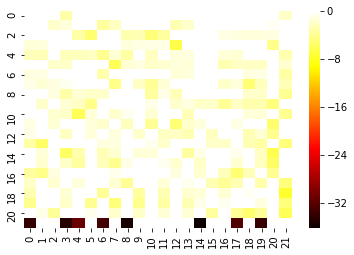

In [18]:
#Evaluating feature importance¶
inv_pca = PCA()
pca_data = inv_pca.fit_transform(train_norm_data)

feature_importance = np.nan_to_num(np.log(inv_pca.inverse_transform(np.eye(train_norm_data.shape[1]))))

import seaborn as sns
sns.heatmap(feature_importance, cmap="hot", cbar=True)

In [ ]:
means = np.mean(pca_data, axis=0)/np.sum(np.mean(pca_data, axis=0))
variances = np.var(pca_data, axis=0)/np.sum(np.var(pca_data, axis=0))
xs = [x for x in range(train_norm_data.shape[1])]
threshold = [0.2 for x in xs]
plt.plot(xs, means, color='red')
plt.plot(xs, variances, color='blue')
plt.plot(xs, threshold, color='green')
plt.legend(loc='best')
plt.show()

In [ ]:
#SVM
def mse(real, pred):
    return np.mean(np.square(real-pred))

In [12]:
data_labels = train_data_labels['residual_fluid_intelligence_score'].astype(np.float)

In [13]:
data_labels.head()

0     3.471969
1    -8.958806
2     2.898313
3     0.218017
4   -18.663981
Name: residual_fluid_intelligence_score, dtype: float64

In [24]:
training = train_norm_data.values.astype(np.float)

In [25]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(training):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 748  749  750 ... 3736 3737 3738] | test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR 

clf = GridSearchCV(SVR(), param_grid=param_grid, n_jobs=-1, cv=10)
clf.fit(X_train,Y_train)

svr = SVR()
svr_fit = svr.fit

#data must be array
scores = cross_val_score(svr_fit, training.data, training.target, cv=5)

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [ ]:
#train_data_labels=train_data_labels.drop(['Unnamed: 0','subjectkey'],axis=1)
#val_data_labels=val_data_labels.drop(['Unnamed: 0','subjectkey'],axis=1)

In [ ]:
#train_labels = train_data_labels['residual_fluid_intelligence_score'].astype(np.float)
#val_labels = val_data_labels['residual_fluid_intelligence_score'].astype(np.float)

In [ ]:
#from sklearn.svm import SVR 

#svr = SVR()
#svr.fit(train_norm_data, train_labels)

preds = svr.predict(normalize_data(val_data))

In [ ]:
mse(preds, val_labels)

In [ ]:
svr.score(normalize_data(val_data), val_labels)

In [ ]:
#random baseline
random_labels = np.random.normal(np.mean(train_labels), np.std(train_labels), len(val_labels))
mse(random_labels, val_labels)

In [ ]:
#majority baseline
majority_labels = [np.mean(train_labels) for x in range(len(val_labels))]
mse(majority_labels, val_labels)